Project: Prediction mean values and exceeding limit days of fine Particulate Matter (PM2.5) in the air - Milan (Italy).

Student: **Alessandro Monolo** | 1790210

Lecturer: Jonas Moons

Fundamentals of Machine Learning - Master Data-Driven Design, Hogeschool Utrecht.

August 2021 - Block E

## Final DataFrame Harmful Elements and weather in Milan from 01.01.2014 to 31.12.2019

Import libraries which can may be useful:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
%matplotlib inline

In [2]:
def sprint_info(df):
    print('This is the shape of df: ', df.shape, '\n')
    print(df.info(), '\n')
    print('This is df: \n', df)

## Data Merging

Import final dataframe of weather and harmful elements of Milan from January 14'to December 19':

In [3]:
df_weather = pd.read_csv('Milan_Final_Weather_2014_2019.csv')

In [4]:
df_harm_elem = pd.read_csv('Milan_Final_Harm_Elem_2014_2019.csv')

Merging the two uploaded dataframes into one complete dataframe:

In [5]:
df_Milan = pd.merge(df_weather, df_harm_elem, on="DateTime")

Fast check if everything has been merged correctly using my resuming function

In [6]:
#sprint_info(df_Milan)

## Final Data cleaning & pre processing

Transforming the column DataTime into a DataTime64[ns]

In [7]:
df_Milan['DateTime'] = pd.to_datetime(df_Milan['DateTime'])

Get from DataTime column a boolean where day of the week corresponds to or not a week end day using numpy and datatime functions to create a new Dataframe column

In [8]:
df_Milan['Weekend_Day'] = np.where(((df_Milan['DateTime']).dt.dayofweek) < 5,0,1)

In [9]:
#df_Milan['Week_Day'].value_counts()

Tidy the order of the columns for my final Dataframe, starting from time data, PM2.5 and its related values, Harmful Elements and finally the atmospheric data

In [10]:
df_Milan = df_Milan.loc[:, ['DateTime', 'Day_of_Week', 'Weekend_Day', 'Month', 'Season', 'PM2.5 µg/m³', 'Over_PM25_Limit', 'Passive_Cigarette', 'PM10 µg/m³', 'NO µg/m³', 'NO2 µg/m³', 'CO mg/m³', 'O µg/m³', 'Mean_Temperature_°C', 'Humidity_Level_%', 'Mean_Windspeed_km/h', 'ATM_Pressure', 'ATM_Phenom_Fog', 'ATM_Phenom_Snow', 'ATM_Phenom_Rain', 'ATM_Phenom_Sultriness']]

Drop the missing values using dropna function and setting implace True to make it final

In [11]:
df_Milan.dropna(inplace=True)

In [12]:
#df_Milan.shape

## Data exploration & visualization

### 1 - Distribution among seasons and Week/Weekend days of daily NO2 values in Milan

*NO2 primarily gets in the air from the burning of fuel. NO2 forms from emissions from cars, trucks and buses, power plants, and off-road equipment.*

<Figure size 1296x864 with 0 Axes>

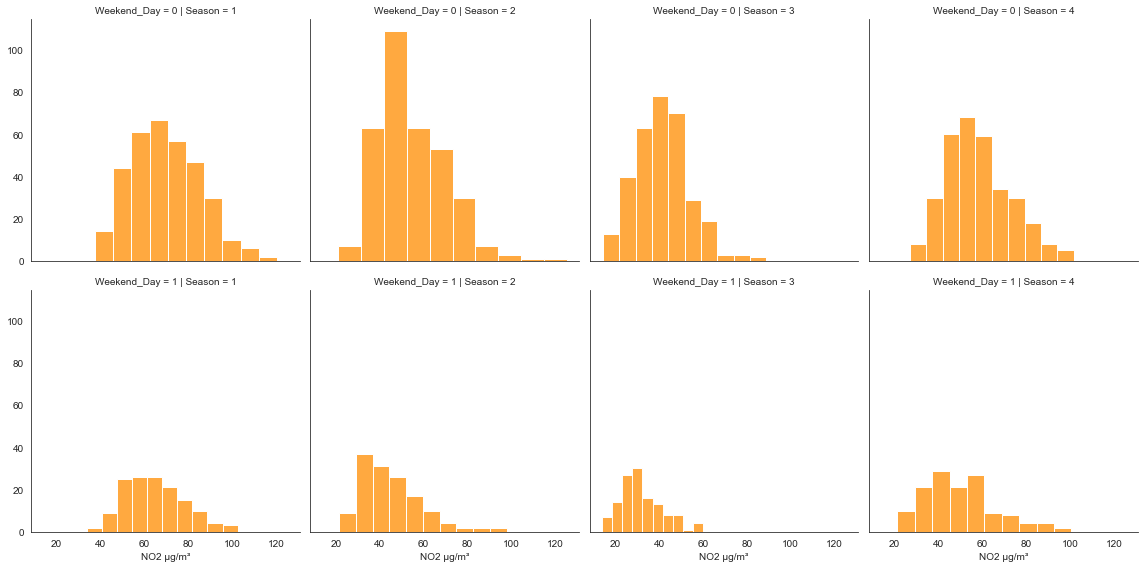

In [13]:
sns.set_style('white') # Set the style of the visualization plot
plt.figure(figsize=(18,12))

facetgrid = sns.FacetGrid(df_Milan, col="Season", height=4.0, aspect=1, row='Weekend_Day') # Here I set the columns and the rows variable
facetgrid.map(sns.histplot, "NO2 µg/m³", bins=10, color='darkorange')

plt.savefig('NO2 Values Distribution among seasons in week and weekend days.jpg', dpi=1000, facecolor='w', format='jpg', optimize=True)
plt.show()

#### Conclusion

The NO2 values distribution in the air appears to be higher during the week than at the weekend.

The widest differences between seasons and days of the week (or weekend days) are found in spring and summer, where the weekend values are significantly lower in comparison than during the working days.

**The worst days of the year can be found between autumn and winter during working days, due to the intense traffic spread during working hours within the metropolis of Milan.**

### 2 - Distribution of PM10 Values from Sunday to Saturday
Two of the main sources of PM10 are industrial activities, as well as car and truck exhausts.

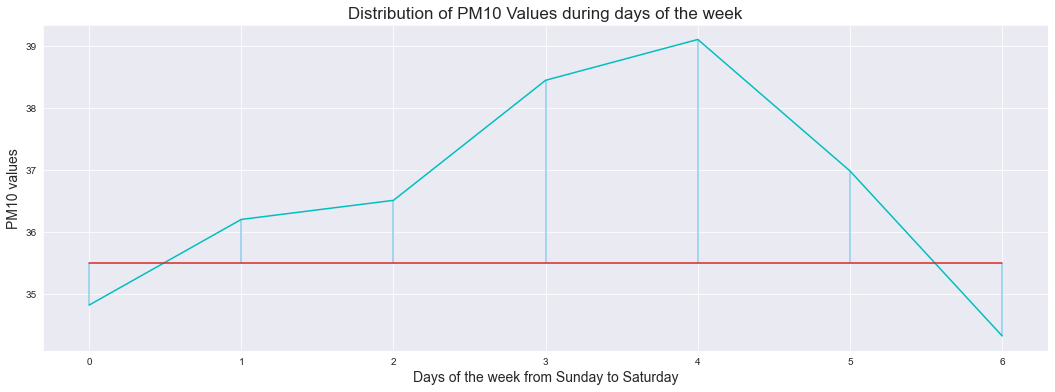

In [14]:
sns.set_style('darkgrid')
plt.figure(figsize=(18,6))

markerline, stemlines, baseline = plt.stem(df_Milan.groupby(df_Milan["Day_of_Week"])["PM10 µg/m³"].mean(), linefmt='skyblue', markerfmt='c', bottom=35.5, use_line_collection=True)

plt.title('Distribution of PM10 Values during days of the week', size= 17)
plt.xlabel('Days of the week from Sunday to Saturday', size= 14)
plt.ylabel('PM10 values', size= 14)

plt.savefig('Distribution of PM10 Values during days of the week.jpg', dpi=1000, facecolor='w', format='jpg', optimize=True)
plt.show()

#### Cunclusion

The average values during the days of the week, from Sunday (0) to Saturday (6), are equally distributed between 35µg/m³ and 39µg/m³.

The highest peak occurs on Thursday with a value of 39.1 PM10 µg / m³, while the lowest peak occurs on Saturday with a value of  34.0 µg / m³.

The days of the week (1, 2, 3, 4, 5), also in this case, as for NO2 values, are the most polluted.

The weekend days, on the other hand, are both lower than the value of 35 µg / m³.

- Traffic of trucks during weekend days is prohibited by law.
- Generally, Industrial activities are inactive during the days of Saturday and Sunday.

**Both points above could positively influence the lowering of PM10 values in the surrounding air of Milan.**

### 3 - Density plot of CO versus mean temperature values

#### 3.1 - Density plot of CO versus mean temperature in foggy or sultry days

I create a subset of days in which either heat or fog were registered. In this case, I indirectly select days with a high percentage of humidity.

In [15]:
df_humid = df_Milan[(df_Milan['ATM_Phenom_Fog'] == 1) | (df_Milan['ATM_Phenom_Sultriness'] == 1)]

I plot here the subset just created using a density plot of Carbon Monoxide versus the mean temperatures registered, in order to understand how **the higher/lower temperatures** together with a **high % of humidity** can influence the amount of Carbon Monoxide in the air.

<Figure size 792x792 with 0 Axes>

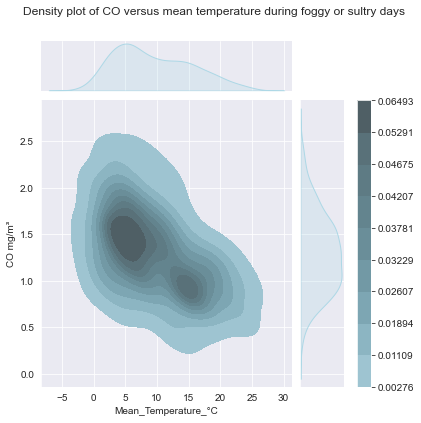

In [16]:
plt.figure(figsize=(11, 11))

kdeplot = sns.jointplot(x=df_humid["Mean_Temperature_°C"], y=df_humid["CO mg/m³"], 
                        kind='kde', color="lightblue", legend=True, cbar=True, fill=True, thresh=0.025)

plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.1)
# get the current positions of the joint ax and the ax for the marginal x
pos_joint_ax = kdeplot.ax_joint.get_position()
pos_marg_x_ax = kdeplot.ax_marg_x.get_position()

# reposition the joint ax so it has the same width as the marginal x ax
kdeplot.ax_joint.set_position([pos_joint_ax.x0, pos_joint_ax.y0, pos_marg_x_ax.width, pos_joint_ax.height])

# reposition the colorbar using new x positions and y positions of the joint ax
kdeplot.fig.axes[-1].set_position([.83, pos_joint_ax.y0, .07, pos_joint_ax.height])
plt.suptitle('Density plot of CO versus mean temperature during foggy or sultry days', size = 12)

plt.savefig('Density plot of CO versus mean temperature in foggy or sultry days.jpg', dpi=1000, facecolor='w', format='jpg', optimize=True)
plt.show()

#### 3.2 - Density plot of CO versus mean temperature during other days

I create a subset of days in which fog and sultry were not regitered. In this case, I indirectly select days with a lower percentage of humidity.

In [17]:
df_not_humid = df_Milan[(df_Milan['ATM_Phenom_Fog'] == 0) | (df_Milan['ATM_Phenom_Sultriness'] == 0)]

I plot here the subset just created using a density plot of Carbon Monoxide versus the mean temperatures registered to understand how the **higher/lower temperatures** together with a **low % of humidity** can influence the amount of Carbon Monoxide in the air.

<Figure size 792x792 with 0 Axes>

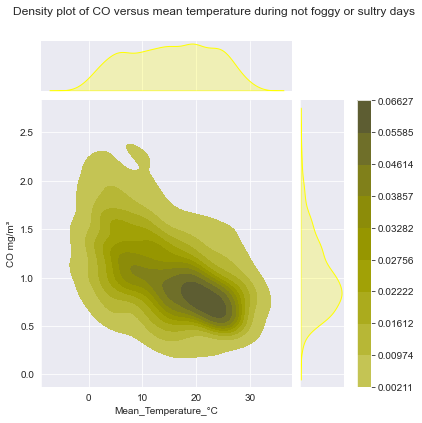

In [18]:
plt.figure(figsize=(11, 11))

kdeplot_1 = sns.jointplot(x=df_not_humid["Mean_Temperature_°C"], y=df_not_humid["CO mg/m³"], 
                          kind='kde', color="yellow", legend=True, cbar=True, fill=True, thresh=0.025)

plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.1)

# get the current positions of the joint ax and the ax for the marginal x
pos_joint_ax = kdeplot_1.ax_joint.get_position()
pos_marg_x_ax = kdeplot_1.ax_marg_x.get_position()

# reposition the joint ax so it has the same width as the marginal x ax
kdeplot_1.ax_joint.set_position([pos_joint_ax.x0, pos_joint_ax.y0, pos_marg_x_ax.width, pos_joint_ax.height])

# reposition the colorbar using new x positions and y positions of the joint ax
kdeplot_1.fig.axes[-1].set_position([.83, pos_joint_ax.y0, .07, pos_joint_ax.height])

plt.suptitle('Density plot of CO versus mean temperature during not foggy or sultry days', size = 12)
plt.savefig('Density plot of CO versus mean temperature during not foggy or sultry days.jpg', dpi=1000, facecolor='w', format='jpg', optimize=True)
plt.show()

##### Conclusion

The level of concentration of carbon monoxide in the air during the days characterized by fog or sultriness, see a higher level **(around 1.5 mg / m³)** than the days in which these atmospheric phenomena are not registered.

Furthermore, with low temperatures **(between 0 and 10 ° C)** the level of CO in the air is higher than at higher temperatures, thanks to the fact that one of the main sources of CO pollution come from heating systems, stoves and fireplaces.

Finally, as can be seen from the X-axes of both the two density plots, in the absence of sultriness or fog, the temperatures are higher than on sultry/foggy days, with a direct consequence on the amount of CO in the air, which sees a lower value **(around 0.75 mg / m³)**.

### 4 - Pairplot of df_Milan to find linearity between columns, using Over PM 2.5 limit as hue differentiator

- *Let's check first how the variables of my dataframe are correlated through a pairplot and a .corr() heatmap.*

- *Finally let's see if the Dataframe of Milan has still any missing values with a .isnull() heatmap.*

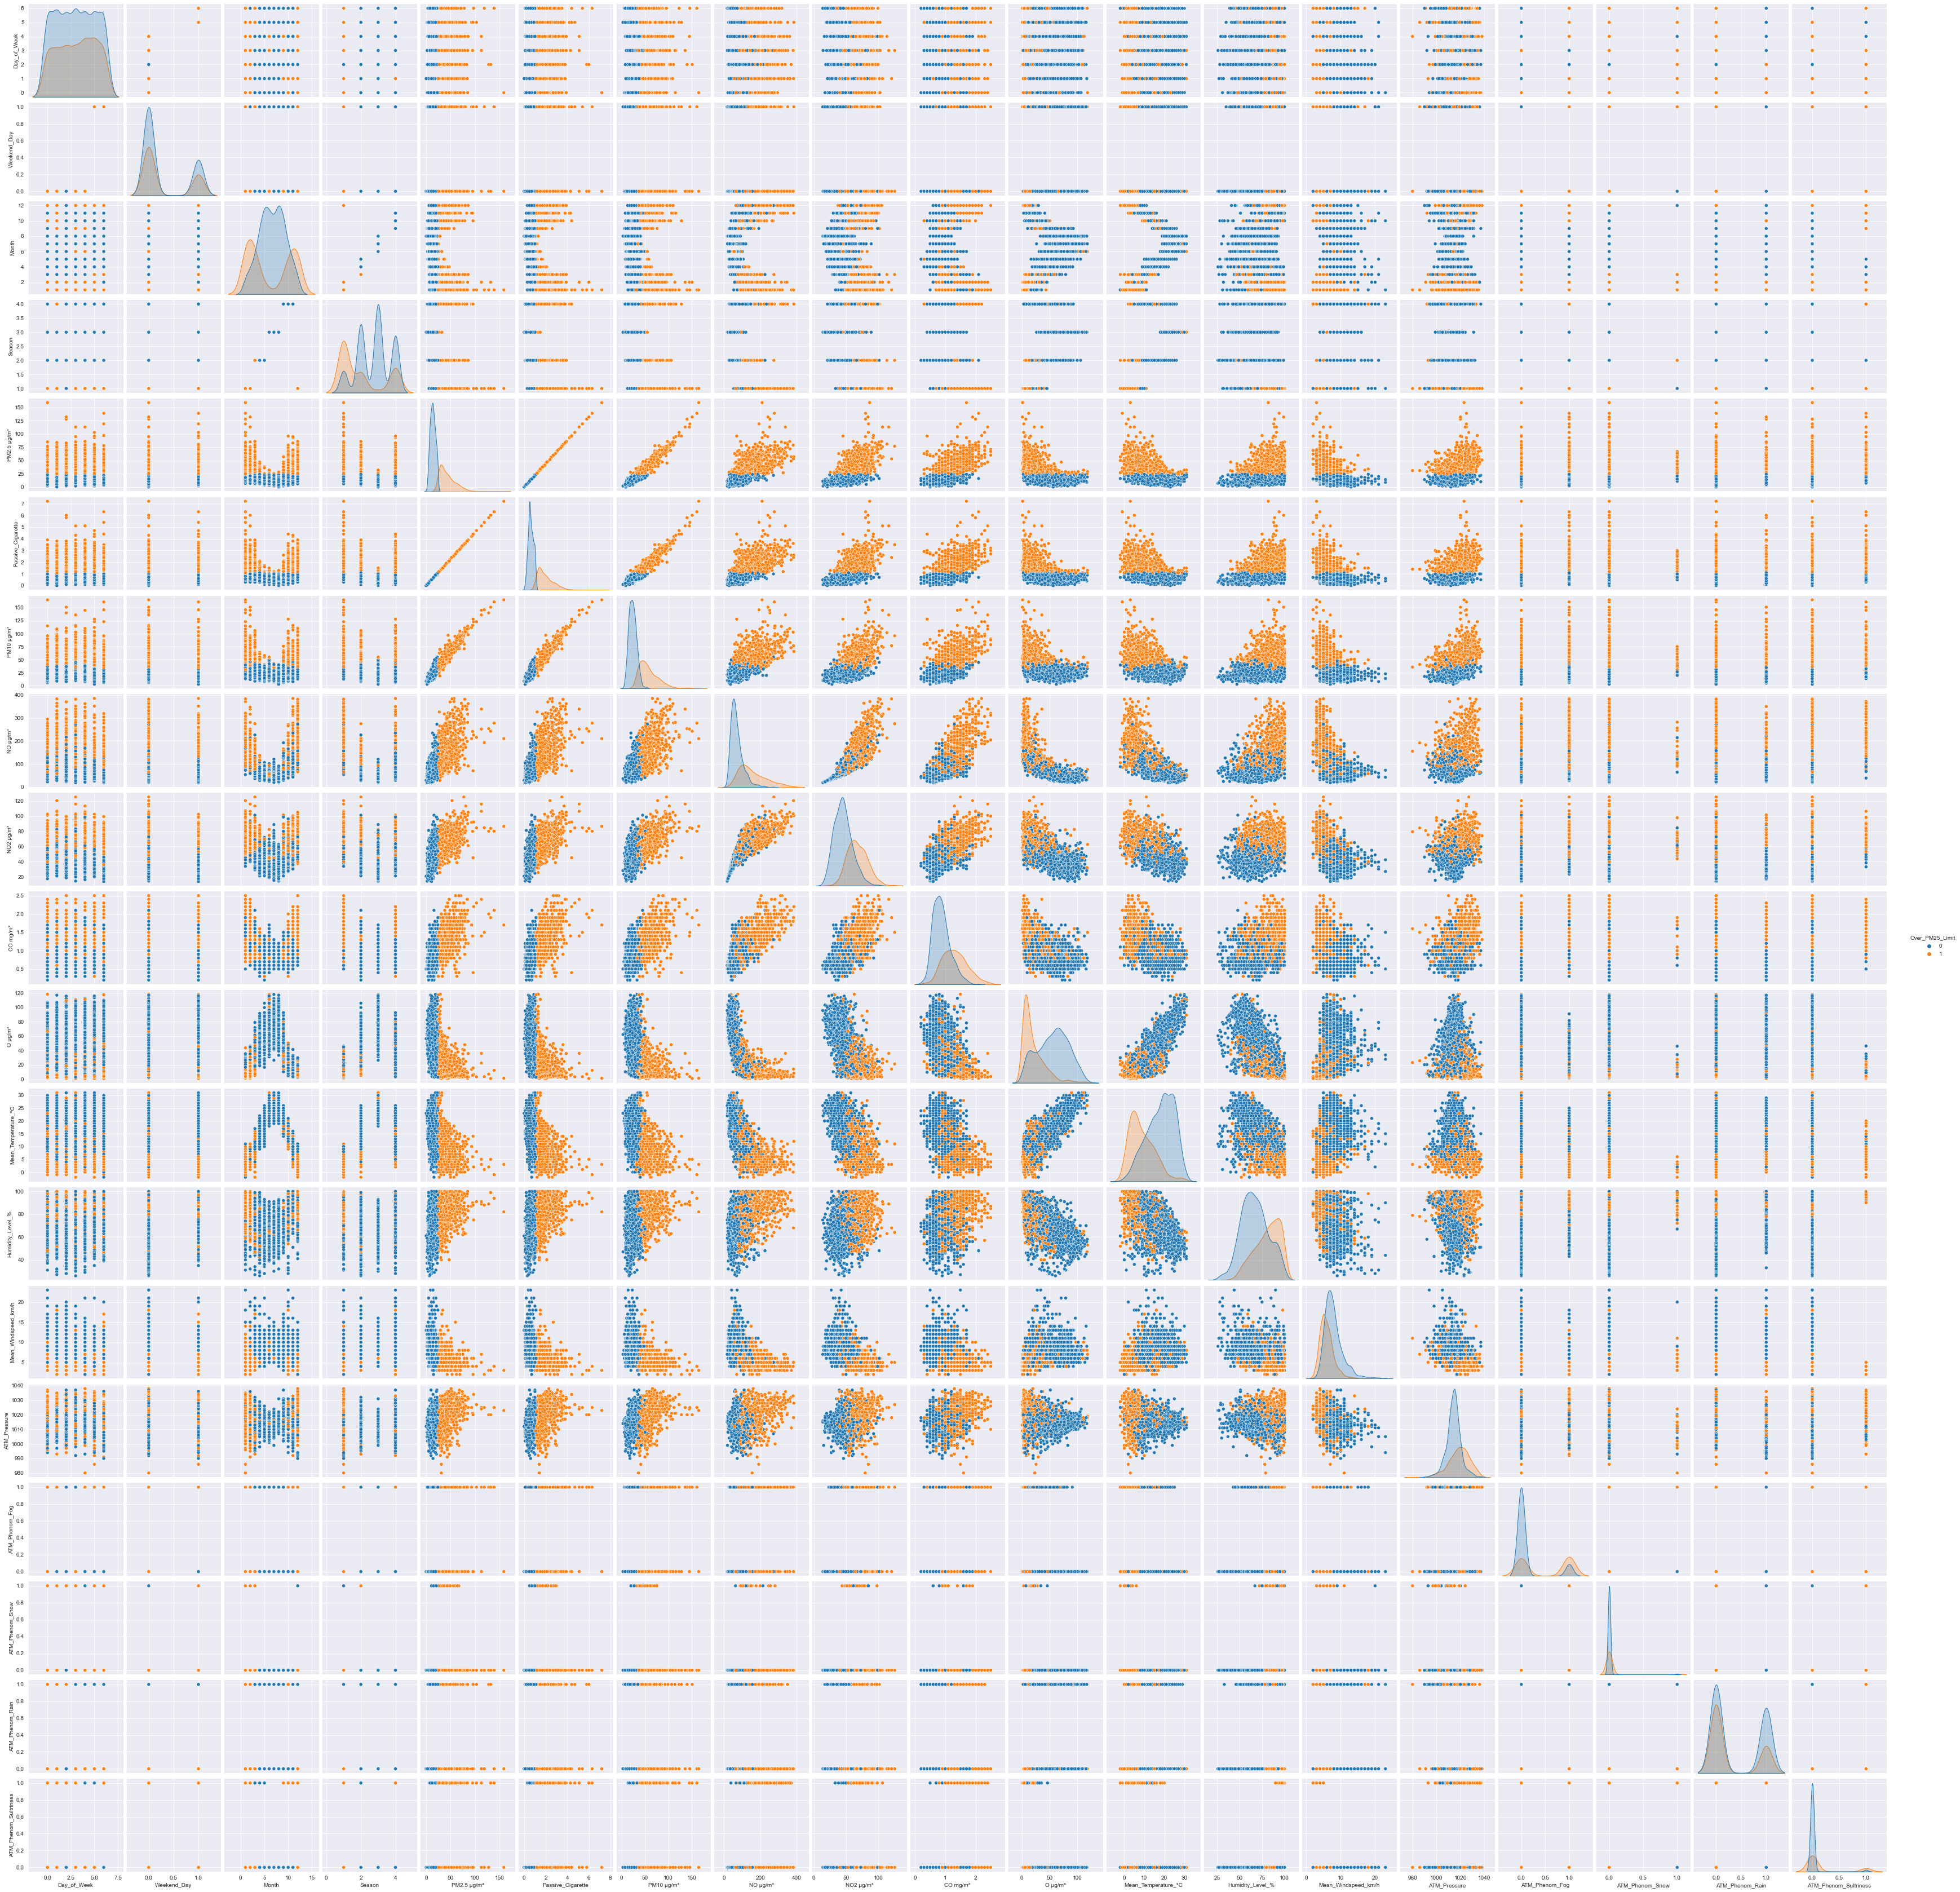

In [19]:
sns.pairplot(df_Milan, hue='Over_PM25_Limit')
plt.show()

### 5 -  Correlation Heatmap between dataframe variables using .corr function

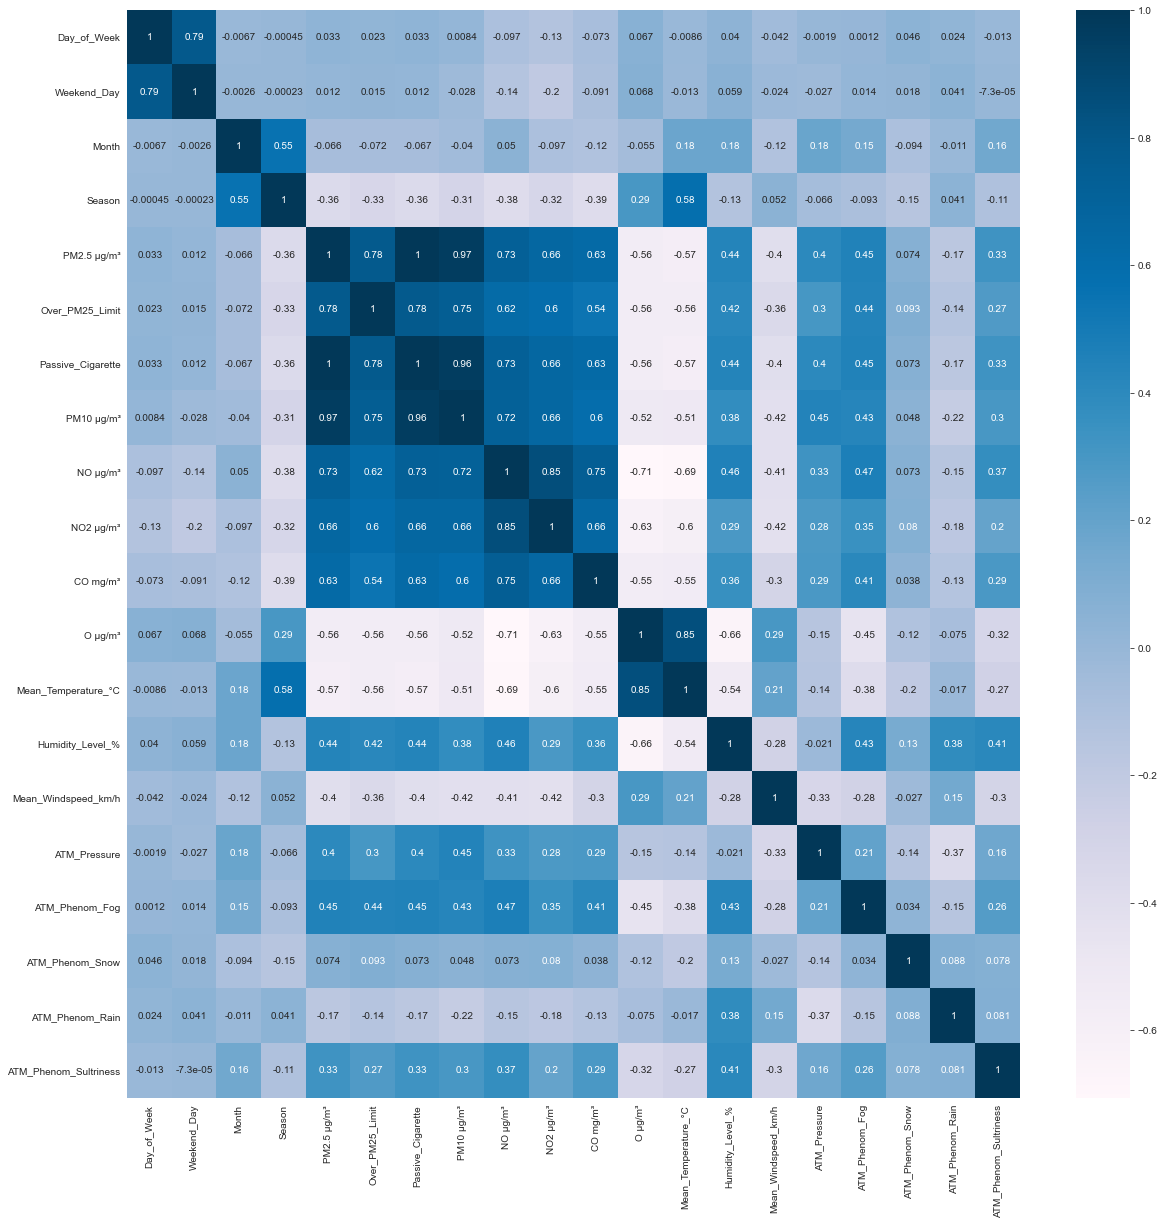

In [20]:
plt.figure(figsize=(20,20))
sns.heatmap(df_Milan.corr(), annot=True, cmap="PuBu")
plt.show()

In [21]:
Fog = df_Milan.groupby(df_Milan['ATM_Phenom_Fog']==1)['Humidity_Level_%'].mean().round(decimals=0)
Sultriness = df_Milan.groupby(df_Milan['ATM_Phenom_Sultriness']==1)['Humidity_Level_%'].mean().round(decimals=0)
print('\n'), print(Fog.reset_index()), print('\n'), print(Sultriness.reset_index()), print('\n')



   ATM_Phenom_Fog  Humidity_Level_%
0           False              68.0
1            True              84.0


   ATM_Phenom_Sultriness  Humidity_Level_%
0                  False              70.0
1                   True              95.0




(None, None, None, None, None)

#### Conclusion

The data frame variables have some clear correlations with PM2.5.

Its highest correlation is with PM10. Indeed, both particulate matters help to define the level of harmful particles present in the air. 

High correlations can also be found with gas like NO2 and NO, which react with other chemicals in the air to form both particulate matter and ozone.
Both of these are also harmful when inhaled due to their effects on the respiratory system, (Basic Information about NO2, 2021).

Humidity too is an important element for PM2.5 values, resulting as a key point in correlation with the foggy days (84 %) and then sultry days (95 %), which are all determined by a high percentage (*see prints below*).
Humidity acts as glue with the substances in the air, including harmful elements, thus helping to raise a higher level of pollution present in the atmosphere, (Zhang et al., 2017).


### 6 - Second heatmap set using .isnull function in order to check any missing values inside the final Dataframe

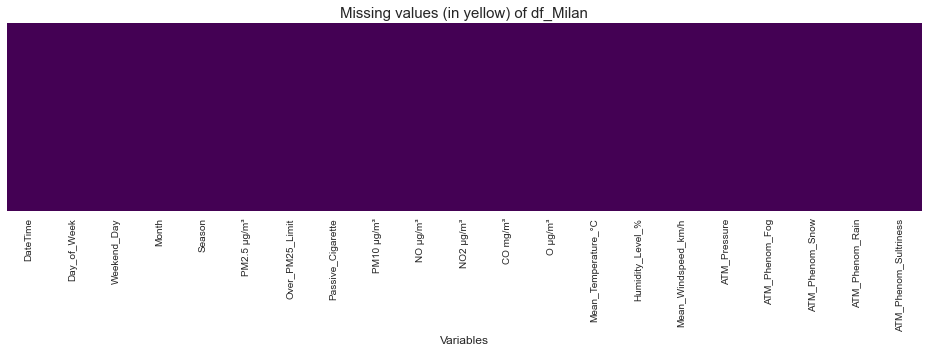

The df_Milan is composed by: (1859, 21) . Therefore, 332 rows out of 2191 has been dropped.


In [22]:
plt.figure(figsize=(13,5))
sns.heatmap(df_Milan.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing values (in yellow) of df_Milan', size=15)
plt.xlabel('Variables', size=12)
plt.tight_layout()
plt.show()
print('The df_Milan is composed by:', df_Milan.shape,'. Therefore, 332 rows out of 2191 has been dropped.')

## Saving the final Milan Dataframe to a CSV file

Before saving I need to drop some columns highly correlated to PM2.5, other that those columns generated from PM2.5.

In [23]:
df_Milan.drop(columns=['DateTime', 'Passive_Cigarette', 'PM10 µg/m³'] ,inplace=True)

In [24]:
df_Milan.to_csv("Milan_Final_Dataframe_2014_2019.csv", index=False)

In [25]:
Milan_Final_Dataframe_2014_2019 = pd.read_csv("Milan_Final_Dataframe_2014_2019.csv")

In [26]:
#Milan_Final_Dataframe_2014_2019.describe()

In [27]:
#sprint_info(Milan_Final_Dataframe_2014_2019)

## Bibliography

- Zhang, L., Cheng, Y., Zhang, Y., He, Y., Gu, Z., & Yu, C. (2017). Impact of Air Humidity Fluctuation on the Rise of PM Mass Concentration Based on the High-Resolution Monitoring Data. Aerosol and Air Quality Research, 17(2), 543–552.


- Basic Information about NO2. (2021, June 7). US EPA. https://www.epa.gov/no2-pollution/basic-information-about-no2